## 14장 2절 

In [2]:
import pandas as pd
hsb2 = pd.read_csv('D:/Stat_Book/Data/hsb2.csv') # 실행시 경로 수정
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,gender,race_f,ses_f,schtyp_f,prog_f
0,70,0,4,1,1,1,57,52,41,47,57,Male,White,Low,Public,General
1,121,1,4,2,1,3,68,59,53,63,61,Female,White,Middle,Public,Vocational
2,86,0,4,3,1,1,44,33,54,58,31,Male,White,High,Public,General
3,141,0,4,3,1,3,63,44,47,53,56,Male,White,High,Public,Vocational
4,172,0,4,2,1,2,47,52,57,53,61,Male,White,Middle,Public,Academic


In [3]:
hsb2['score'] = (hsb2.read + hsb2.write + hsb2.math + hsb2.science + hsb2.socst)/5
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,gender,race_f,ses_f,schtyp_f,prog_f,score
0,70,0,4,1,1,1,57,52,41,47,57,Male,White,Low,Public,General,50.8
1,121,1,4,2,1,3,68,59,53,63,61,Female,White,Middle,Public,Vocational,60.8
2,86,0,4,3,1,1,44,33,54,58,31,Male,White,High,Public,General,44.0
3,141,0,4,3,1,3,63,44,47,53,56,Male,White,High,Public,Vocational,52.6
4,172,0,4,2,1,2,47,52,57,53,61,Male,White,Middle,Public,Academic,54.0


In [4]:
hsb2.groupby('ses_f').score.mean()

ses_f
High      56.234483
Low       48.617021
Middle    51.890526
Name: score, dtype: float64

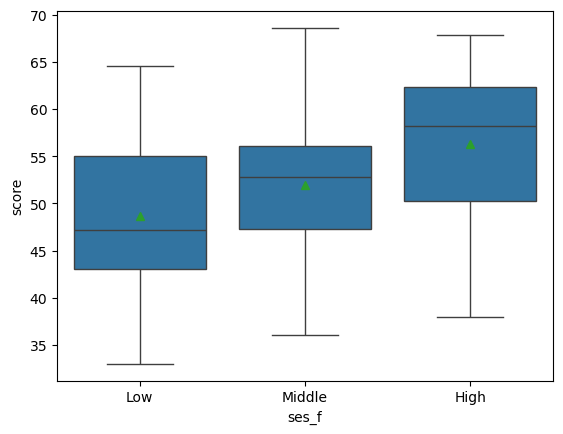

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.boxplot(x = 'ses_f', y = 'score', data=hsb2, showmeans = True)
plt.show()

In [6]:
low = hsb2.loc[hsb2.ses == 1, 'score']
middle = hsb2.loc[hsb2.ses == 2, 'score']
high = hsb2.loc[hsb2.ses == 3, 'score']

In [7]:
from scipy import stats
s, p = stats.bartlett(low, middle, high)
print('p-value : %.4f' % p)

p-value : 0.7501


In [8]:
fstat, pvalue = stats.f_oneway(low, middle, high)
print('F-검정통계량: %.3f' % fstat, ', p-value : ', pvalue)

F-검정통계량: 13.008 , p-value :  4.941575599001891e-06


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
model = ols('score ~ ses_f', data=hsb2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
ses_f,1549.988909,2.0,13.007895,0.000005
Residual,11737.018891,197.0,NaN,NaN


In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result = pairwise_tukeyhsd(hsb2.score, hsb2.ses_f, alpha = 0.05)
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  High    Low  -7.6175    0.0 -11.1949   -4.04   True
  High Middle   -4.344 0.0025  -7.3815 -1.3065   True
   Low Middle   3.2735  0.048   0.0228  6.5242   True
-----------------------------------------------------
